## Customer Churn Prediction

In [49]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [50]:
# Load dataset
data = pd.read_csv(r'Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [51]:
# Drop unnecessary columns

data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [52]:
# Encode categorical variables

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])           # Male:1, Female:0
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)    # One-hot encode Geography

In [53]:
# Separate features and target

X = data.drop('Exited', axis=1)
y = data['Exited']

In [54]:
# Scale numerical features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Split the dataset (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
# Initialize models

log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

In [57]:
# Train models

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [58]:
# Predict on test data

y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [59]:
# Evaluation function

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_pred)
    }

In [60]:
# Evaluate all models

log_metrics = evaluate_model(y_test, y_pred_log)
rf_metrics = evaluate_model(y_test, y_pred_rf)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)

In [61]:
# Print performance metrics

print("Logistic Regression Metrics:", log_metrics)
print("\nRandom Forest Metrics:", rf_metrics)
print("\nXGBoost Metrics:", xgb_metrics)

Logistic Regression Metrics: {'Accuracy': 0.811, 'Precision': 0.5524475524475524, 'Recall': 0.2010178117048346, 'F1 Score': 0.2947761194029851, 'ROC AUC': 0.5805960247074267}

Random Forest Metrics: {'Accuracy': 0.866, 'Precision': 0.7659574468085106, 'Recall': 0.4580152671755725, 'F1 Score': 0.5732484076433121, 'ROC AUC': 0.7118950013538099}

XGBoost Metrics: {'Accuracy': 0.864, 'Precision': 0.7137809187279152, 'Recall': 0.5139949109414759, 'F1 Score': 0.5976331360946746, 'ROC AUC': 0.7317952152716092}


In [62]:
# Feature Importance Visualization (Random Forest)

feature_names = X.columns
importances = rf_clf.feature_importances_

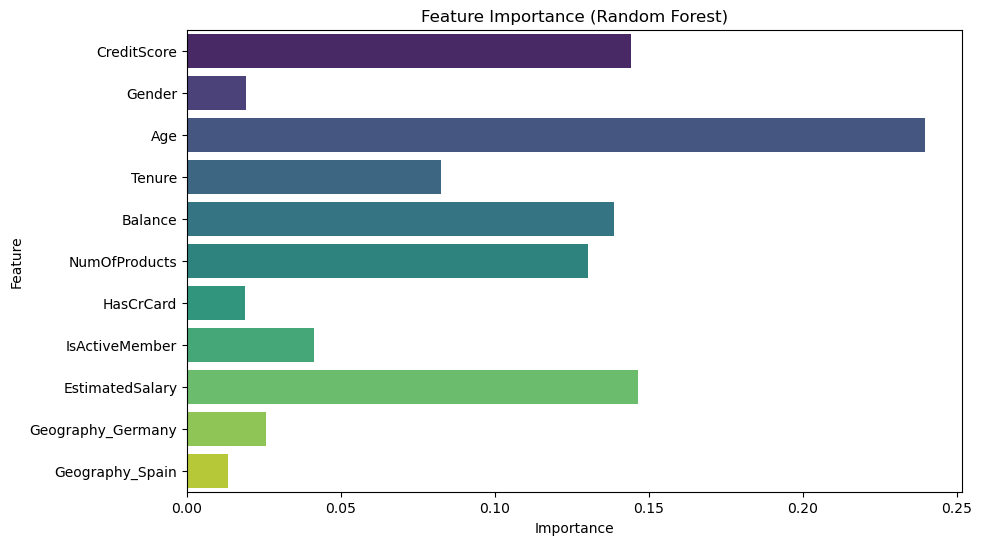

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [64]:
# Confusion Matrix Visualization (XGBoost)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

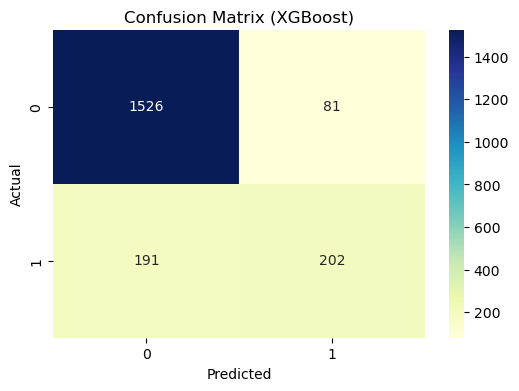

In [65]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Performance Comparison

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [log_metrics['Accuracy'], rf_metrics['Accuracy'], xgb_metrics['Accuracy']]
f1_scores = [log_metrics['F1 Score'], rf_metrics['F1 Score'], xgb_metrics['F1 Score']]

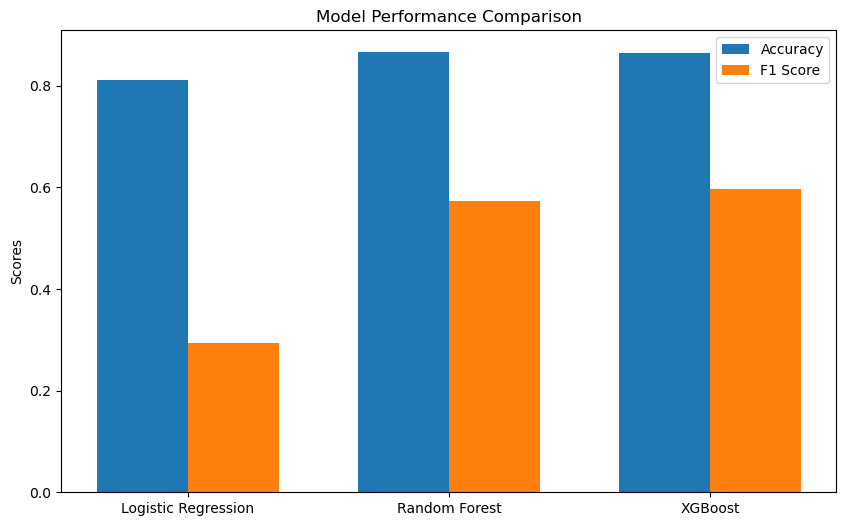

In [67]:
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracy_scores, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')

plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names)
plt.legend()
plt.show()